In [196]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split


In [197]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
inputs = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked','Survived'], axis='columns')
target = df.Survived
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [199]:
from sklearn.preprocessing import LabelEncoder
numsex = LabelEncoder()

In [200]:
inputs['SexUpdate'] = numsex.fit_transform(inputs['Sex'])

In [201]:
inputs.head()

,Pclass,Sex,Age,Fare,SexUpdate
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [202]:
inputnew = inputs.drop('Sex',axis='columns')
inputnew.head()

,Pclass,Age,Fare,SexUpdate
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [203]:
inputnew[inputnew.isna().any(axis=1)]


,Pclass,Age,Fare,SexUpdate
5,3,NaN,8.4583,1
17,2,NaN,13.0000,1
19,3,NaN,7.2250,0
26,3,NaN,7.2250,1
28,3,NaN,7.8792,0
...,...,...,...,...
859,3,NaN,7.2292,1
863,3,NaN,69.5500,0
868,3,NaN,9.5000,1
878,3,NaN,7.8958,1


In [204]:
inputnew = inputnew.fillna(inputnew.mean())
inputnew.head()

,Pclass,Age,Fare,SexUpdate
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [205]:
inputnew

,Pclass,Age,Fare,SexUpdate
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [206]:
inputnew[inputnew.isna().any(axis=1)]


,Pclass,Age,Fare,SexUpdate


In [207]:
inputnew

,Pclass,Age,Fare,SexUpdate
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [208]:
x_train,x_test,y_train,y_test = train_test_split(inputnew,target,train_size=0.8)

In [209]:
model = tree.DecisionTreeClassifier()

In [210]:
x_test

,Pclass,Age,Fare,SexUpdate
785,3,25.000000,7.2500,1
51,3,21.000000,7.8000,1
834,3,18.000000,8.3000,1
606,3,30.000000,7.8958,1
453,1,49.000000,89.1042,1
...,...,...,...,...
701,1,35.000000,26.2875,1
336,1,29.000000,66.6000,1
76,3,29.699118,7.8958,1
633,1,29.699118,0.0000,1


In [211]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [212]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [213]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [214]:
model.score(x_test,y_test)

0.7988826815642458

In [215]:
y_predict = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[95, 21],
       [15, 48]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

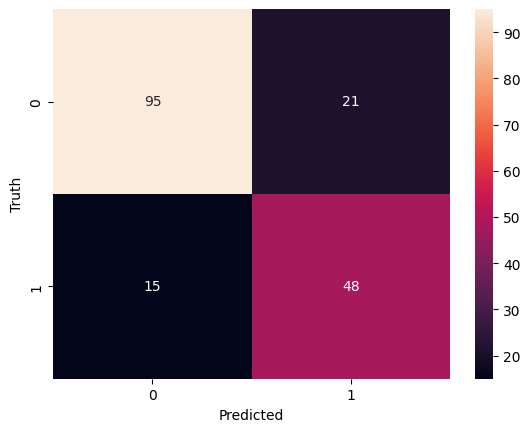

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')